# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов, байесовких методов и линейной регрессии.

# Внимание! Задачи по линейной регрессии будут добавлены позже.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2<font size="5" color="red">\*</font> - 3 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 5 баллов
* Задача 5<font size="5" color="red">\*</font> - 2 балла
* Задача 6 - 4 балла
* Задача 7 - 1 балл
* Задача 8 - 3 балла
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* Задача 10 - 5 баллов
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [651]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd
import seaborn as sns
import scipy as sp

%matplotlib inline

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

In [652]:
def draw_confidence_interval(left,  # левая граница интервала
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=(None, None)):  # ограничение по оси y
    plt.figure(figsize=(14, 5))
    n = np.arange(1, 101)
    plt.fill_between(n, right, left, alpha=0.15, color='r', label='confidence interval')
    if sample is not None:
        plt.scatter(n, sample, alpha=0.2, s=40, label='sample')
    if estimation is not None:
        plt.plot(n, estimation, color='red', linewidth=2.5)
    plt.legend()
    plt.ylim(ylim) 
    plt.grid(ls=':')
    plt.show()

Сгенерируйте выборки и постройте графики доверительных интервалов по следующей схеме.
* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.
* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.
* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.
* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


Генерировать выборки размера 100, уровень доверия брать $\alpha=0.95$. Для вычисления квантилей у каждого распределения из `scipy.stats` есть функция `ppf`.

Сделайте вывод. Насколько часто истинное значение параметра попадает в доверительный интервал? Как длина интервала зависит от размера выборки?

Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

Доверительный интервал для $\theta$ есть $$\left( \overline{X} - \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} , \overline{X} + \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$

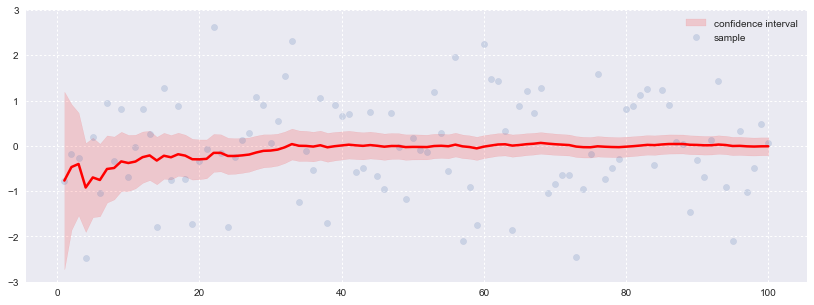

In [667]:
alpha = 0.95
sample = sps.norm(loc=0, scale=1).rvs(size=100)
left = np.cumsum(sample) / np.arange(1, 101) - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, 101))
right = np.cumsum(sample) / np.arange(1, 101) + sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, 101))
estimator = np.cumsum(sample) / np.arange(1, 101)
draw_confidence_interval(left, right, estimation=estimator, sample=sample, ylim=(-3, 3))

Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.

Доверительный интервал для $\theta$ есть $$\left(X_{(n)}, \dfrac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$$

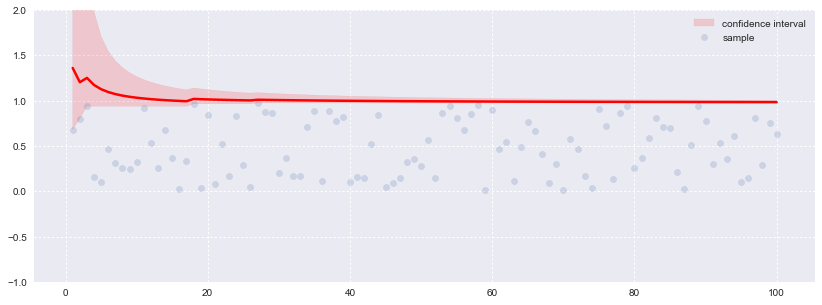

In [668]:
sample = sps.uniform.rvs(size=100)
cummax_sample = np.maximum.accumulate(sample)
estimator = np.arange(2, 102) / np.arange(1, 101) * cummax_sample
draw_confidence_interval(cummax_sample, cummax_sample / (1 - alpha) ** (1 / np.arange(1, 101)),
                         estimation=estimator, sample=sample, ylim=(-1, 2))

Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.

Доверительный интервал для $\theta$ есть $$\left( \dfrac{\beta}{\overline{X}} + \dfrac{\sqrt{\frac{\beta}{n}} z_{\frac{1 - \alpha}{2}}}{\overline{X}}, \dfrac{\beta}{\overline{X}} + \dfrac{\sqrt{\frac{\beta}{n}} z_{\frac{1 + \alpha}{2}}}{\overline{X}} \right)$$

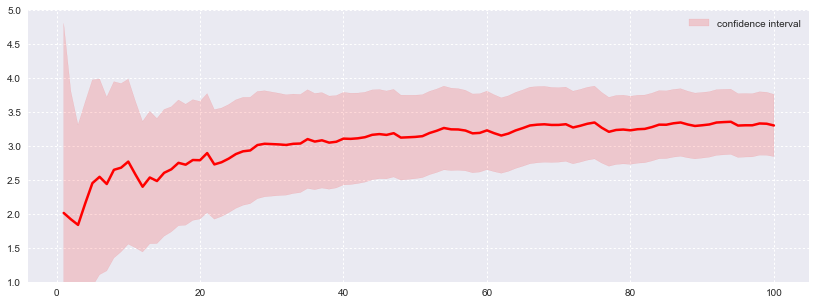

In [669]:
sample = sps.gamma(a=2, scale=1/3).rvs(size=100)
cummean = np.cumsum(sample) / np.arange(1, 101)
left = 2 / cummean + sps.norm.ppf((1 - alpha) / 2) * np.sqrt(2 / np.arange(1, 101)) / cummean
right = 2 / cummean + sps.norm.ppf((1 + alpha) / 2) * np.sqrt(2 / np.arange(1, 101)) / cummean
estimator = 2 / cummean
draw_confidence_interval(left, right, estimator, ylim=(1, 5))

Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.

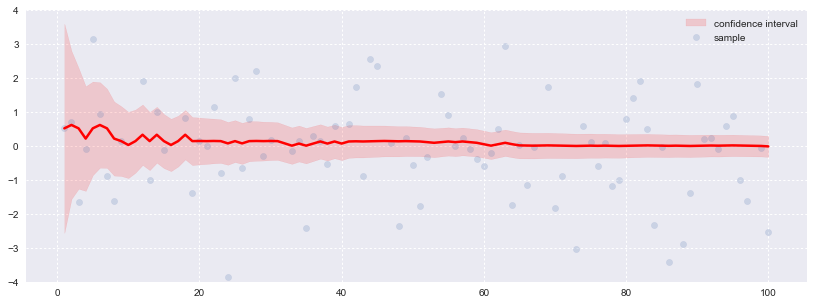

In [670]:
sample = sps.cauchy.rvs(size=100)
cummedian = np.array(list(map(lambda n: np.median(sample[:n]), range(1, 101))))
left = cummedian - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(np.arange(1, 101)))
right = cummedian - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(np.arange(1, 101)))
estimator = cummedian
draw_confidence_interval(left, right, estimation=cummedian, sample=sample, ylim=(-4, 4))

Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

Доверительный интервал для $\theta$ есть $$\left( \overline{X} - \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} , \overline{X} + \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$

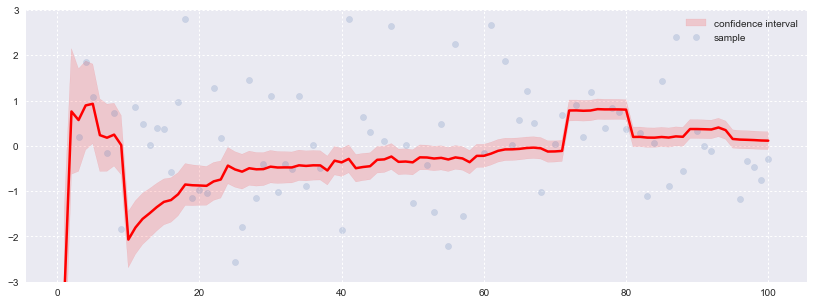

In [679]:
sample = sps.cauchy.rvs(size=100)
left = np.cumsum(sample) / np.arange(1, 101) - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, 101))
right = np.cumsum(sample) / np.arange(1, 101) + sps.norm.ppf((1 + alpha) / 2) / np.sqrt(np.arange(1, 101))
estimator = np.cumsum(sample) / np.arange(1, 101)
draw_confidence_interval(left, right, estimation=estimator, sample=sample, ylim=(-3, 3))

** Вывод: **
# TODO

**Задача 2<font size="5" color="red">\*</font>.** 
Аналогично заданию 1 постройте доверительные интервалы для следующих случаев
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

#### 1
Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.

Запишем многомерную ЦПТ

$$\left(\begin{pmatrix}
    \overline{X}   \\
    \overline{X^2} \\
\end{pmatrix} - \begin{pmatrix}
    \dfrac{\beta}{\theta}   \\
    \dfrac{\beta(\beta + 1)}{\theta^2} \\
\end{pmatrix} \right) \to \xi \sim \mathcal{N}(0, \Sigma)$$

Составим вначале матрицу ковариаций
$$ \Sigma(\theta, \beta) = \begin{pmatrix}
    \dfrac{\beta}{\theta^2}       & \dfrac{\beta^3 + 2\beta^2}{\theta^3} \\
    \dfrac{\beta^3 + 2\beta^2}{\theta^3}       & \dfrac{4\beta^3 + 10\beta^2 + 6\beta}{\theta^4} \\
\end{pmatrix} $$

Теперь воспользуемся теоремой о наследовании ассимптотической нормальности для функции  $h(x, y) = \dfrac{x}{y - x^2}$. Ее градиент $$\nabla h (x, y) = \begin{pmatrix}
    \dfrac{y + x^2}{(y - x^2)^2} \\
    -\dfrac{x}{(y - x^2)^2} \\
\end{pmatrix}$$

По методу моментов имеем оценки $$\theta^* = \dfrac{\overline{X}}{S^2}$$ $$\beta^* = \dfrac{\overline{x^2}}{S^2}$$

и $\overline{X}$, $\overline{X^2}$ есть асимптотически нормальне оценки для $\dfrac{\beta}{\theta}$ и $\dfrac{\beta(\beta + 1)}{\theta^2}$ соответственно.

Теорема о наследовании асимптотической нормальности и лемма Слуцкого:

Получаем, что $h(\overline{X}, \ \overline{X^2})$ есть а.н.о. для $h(\dfrac{\beta}{\theta}, \ \dfrac{\beta(\beta + 1)}{\theta^2}) = \theta$ с а.д.:


$$\sigma^2 = \nabla h (\overline{X}, \ \overline{X^2})^T \sigma(\dfrac{\overline{X}}{S^2}, \ \dfrac{\overline{x^2}}{S^2}) \nabla h (\overline{X}, \ \overline{X^2})$$

Тогда из формулы для а.н.о получаем доверительный интервал:
    
$$ \left( h (\overline{X}, \ \overline{X^2}) - \dfrac{\sigma z_{\frac{1 + \alpha}{2}}}{\sqrt{n}}, h (\overline{X}, \ \overline{X^2}) + \dfrac{\sigma z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$

In [815]:
sample = sps.gamma(a=2, scale=1/3).rvs(size=100)

In [816]:
def cummean(s):
    return np.cumsum(s) / np.arange(1, len(s) + 1)

In [823]:
def S_sqr(s):
    return np.mean(s**2) - np.mean(s) ** 2

In [829]:
def cov_matrix(theta, beta):
    return np.array([
        [beta/theta**2, (beta**3 + 2*beta**2) / theta**3], 
        [(beta**3 + 2*beta**2) / theta**3, 
         (4*beta**3 + 10*beta**2 + 6*beta)/theta**4]
    ])

In [830]:
def grad_h(x, y):
    return np.array([
        (y + x**2)/(y - x**2)**2, -x/(y - x**2)**2 
    ])

In [831]:
cov_matrix(np.mean(sample) / S_sqr(sample), np.mean(sample ** 2) / S_sqr(sample))


array([[ 0.32135424,  2.17027665],
       [ 2.17027665,  2.83062805]])

In [832]:
def get_sigma(s):
    return grad_h(np.mean(s), np.mean(s**2)).T @ cov_matrix(np.mean(s) / S_sqr(s), np.mean(s ** 2) / S_sqr(s)) @ grad_h(np.mean(s), np.mean(s**2))

In [833]:
get_sigma(sample)

-1879.5339976119503

#### 2
Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

Тут совершенно аналогично, только берем функцию $h(x, y) = \dfrac{x^2}{y - x^2}$. Ее градиент $$\nabla h (x, y) = \begin{pmatrix}
    \dfrac{2xy + x^3}{(y - x^2)^2} \\
    -\dfrac{x^2}{(y - x^2)^2} \\
\end{pmatrix}$$

Доверительный интервал будет таким же!

** Вывод: **
# TODO

**Задача 3<font size="5" color="red">\*</font>.** 
Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.

Доверительная область для $\theta$ есть $$ n (\overline{X} - \mu)^{T} \Sigma^{-1} (\overline{X} - \mu) <  \chi^2_{2, \alpha} $$

In [490]:
n = 200
alphas = [0.5, 0.8, 0.95]
mean = np.array([0, 0])
cov = np.array([[2, 1], [1, 3]])
sample = sps.multivariate_normal(mean, cov).rvs(size=n)
mean_sample = np.mean(sample, axis=0)
inv_cov = sp.linalg.inv(cov)

In [491]:
cr = lambda mean, chi_2_ppf: n * (mean_sample - mean).T @ inv_cov @ (mean_sample - mean) < chi_2_ppf

In [492]:
grid = np.mgrid[-5:5:0.05, -5:5:0.05]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]

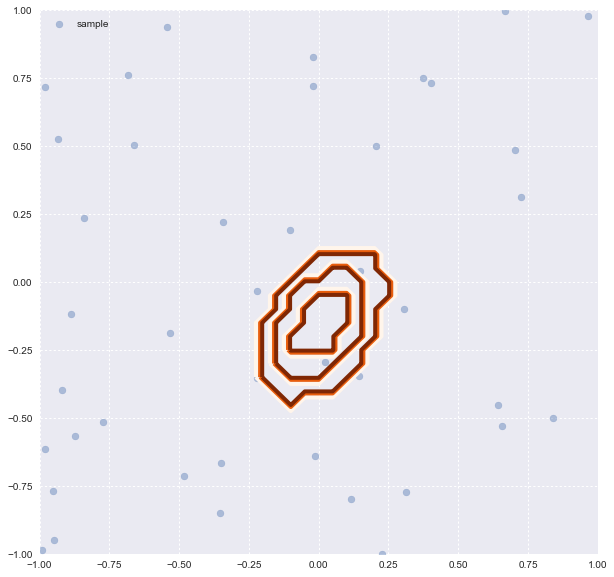

In [493]:
plt.figure(figsize=(10, 10))
for alpha in alphas:
    chi_2_ppf = sps.chi2(df=2).ppf(alpha)
    conf_reg = np.array(list(map(lambda x, y: cr(np.array([x, y]), chi_2_ppf), 
                             grid[0].reshape(-1), grid[1].reshape(-1))))
    CS = plt.contour(grid[0], grid[1], conf_reg.reshape(grid[0].shape), alphas, linewidths=4, cmap='Oranges')
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()

Ну не очень красивая штука, да. На графике обозначены доверительные области для различного уровня доверия: 0.5, 0.8, 0.95

** Вывод: **
Аналогично заданию 1, только посмотрели на доверительную область различных уровней доверия для двумерного гауссовского вектора)

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

In [156]:
def calc_Glivenko_for_one(sample, ecdf, cdf):
    sorted_sample = np.sort(sample)
    ecdf_values = np.hstack((0, ecdf(sorted_sample)))
    cdf_values = cdf(sorted_sample)
    return np.max(np.abs(np.hstack((cdf_values - ecdf_values[:len(sample)], cdf_values - ecdf_values[1:]))))

def calc_Glivenko_for_all(T_nk):
    ecdf_array = list(map(lambda sample: ECDF(sample), T_nk.T))
    D_n = np.array(list(map(lambda n: calc_Glivenko_for_one(T_nk.T[n], ecdf_array[n], sps.norm.cdf), 
                            np.arange(0, N))))
    return D_n

 $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.

In [218]:
N, K = 300, 10**5
samples = sps.norm.rvs(size=(K, N))
arange = np.arange(1, N + 1)
T1 = lambda sample: np.cumsum(sample) / arange * np.sqrt(arange)
S_sqr = lambda sample: np.cumsum(sample ** 2) / arange - (np.cumsum(sample) / arange) ** 2
T2 = lambda sample: T1(sample) / np.sqrt(S_sqr(sample))
T1_nk = np.array(list(map(lambda sample: T1(sample), samples)))
T2_nk = np.array(list(map(lambda sample: T2(sample), samples)))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


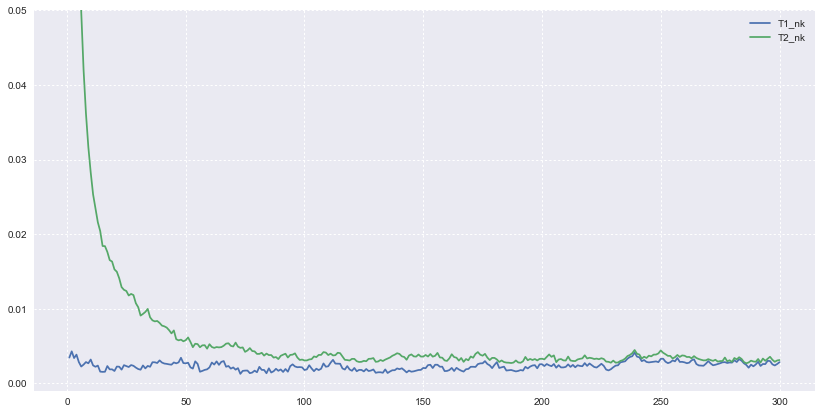

CPU times: user 18.2 s, sys: 586 ms, total: 18.8 s
Wall time: 18.8 s


In [160]:
%%time
plt.figure(figsize=(14, 7))
D1_n = calc_Glivenko_for_all(T1_nk)
D2_n = calc_Glivenko_for_all(T2_nk)
plt.plot(np.arange(1, N + 1), D1_n, label='T1_nk')
plt.plot(np.arange(1, N + 1), D2_n, label='T2_nk')
plt.ylim(-0.001, 0.05)
plt.legend(loc='best')
plt.grid(ls=':')
plt.show()

$X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.

In [680]:
p = 0.5
N, K = 300, 10**5
samples = sps.bernoulli(p).rvs(size=(K, N))
arange = np.arange(1, N + 1)
cummean = lambda sample: np.cumsum(sample) / arange
T1 = lambda sample: np.sqrt(arange) * (cummean(sample) - p) / np.sqrt(p * (1 - p))
S_sqr = lambda sample: np.cumsum(sample ** 2) / arange - (np.cumsum(sample) / arange) ** 2
T2 = lambda sample: np.sqrt(arange) * (cummean(sample) - p) / np.sqrt(S_sqr(sample))
T1_nk = np.array(list(map(lambda sample: T1(sample), samples)))
T2_nk = np.array(list(map(lambda sample: T2(sample), samples)))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


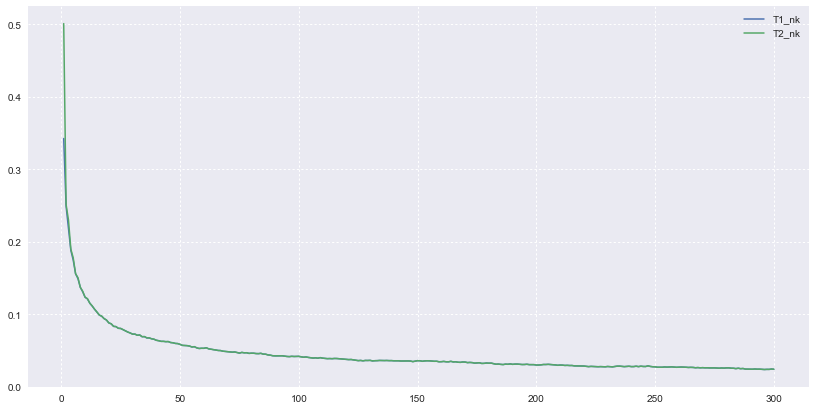

CPU times: user 13.2 s, sys: 502 ms, total: 13.7 s
Wall time: 13.8 s


In [682]:
%%time
plt.figure(figsize=(14, 7))
D1_n = calc_Glivenko_for_all(T1_nk)
D2_n = calc_Glivenko_for_all(T2_nk)
plt.plot(np.arange(1, N + 1), D1_n, label='T1_nk', linewidth=1.5)
plt.plot(np.arange(1, N + 1), D2_n, label='T2_nk', linewidth=1.5)
plt.legend(loc='best')
plt.grid(ls=':')
plt.show()

In [244]:
%%time
N, K = 300, 10**5
samples = sps.cauchy.rvs(size=(K, N))
arange = np.arange(1, N + 1)

CPU times: user 1.21 s, sys: 597 ms, total: 1.81 s
Wall time: 1.85 s


In [152]:
%%time
T_nk = np.array(list(map(lambda n: np.sqrt(n) * np.median(samples[:, :n], axis=1) / (np.pi / 2), range(1, N + 1))))

CPU times: user 1min 11s, sys: 15.6 s, total: 1min 27s
Wall time: 1min 27s


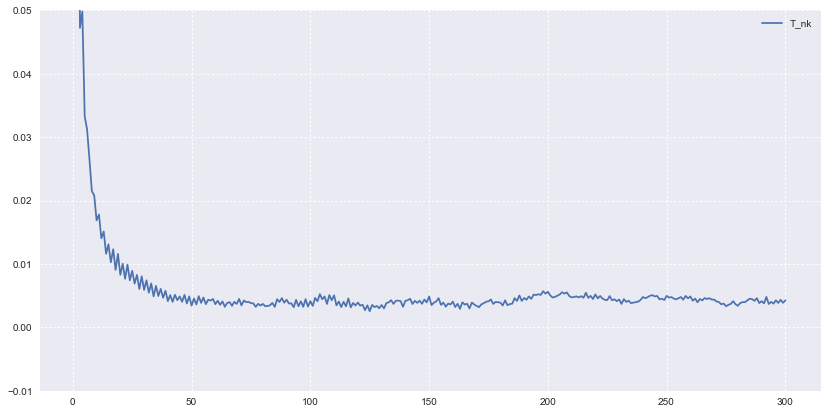

In [164]:
plt.figure(figsize=(14, 7))
D_n = calc_Glivenko_for_all(T_nk.T)
plt.plot(np.arange(1, N + 1), D_n, label='T_nk')
plt.legend(loc='best')
plt.ylim(-0.01, 0.05)
plt.grid(ls=':')
plt.show()

** Вывод: **
действительно, для исследуемых статистик уже начиная с выборок размера 40-50 их эмперическая функция распределения очень хорошо приближается стандартным нормальным. Значение статистики $D_n$ уже там меьньше, чем $0.1$. При размере выборки $\to \infty$ видим, что $D_n \to 0$. Что очевидно -- это теорема Гливенко-Кантелли

**Задача 5<font size="5" color="red">\*</font>.** 
Проведите исследование аналогичное задаче 4 для статистик из задачи 2.

** Вывод: **
# TODO

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [736]:
def normal_summary(sample):
    size = len(sample)
    sample_mean = np.mean(sample)
    sample_meadian = np.median(sample)
    sample_std = np.std(sample)
    left_confidence = sample_mean - sps.t(df=size - 1).ppf((1 + alpha) / 2) * sample_std / np.sqrt(size)
    right_confidence = sample_mean + sps.t(df=size - 1).ppf((1 + alpha) / 2) * sample_std / np.sqrt(size)
    confidence_interval = (left_confidence, right_confidence)
    kstest = sps.kstest(sample, sps.norm(loc=sample_mean, scale=sample_std).cdf)
    print('size: %d' %size)
    print('sample mean: %.2f' % sample_mean)
    print('sample median: %.2f' % sample_meadian)
    print('sample std: %.2f' % sample_std)  # стандартное отклонение = корень из дисперсии
    print('0.95 confidence interval: (%.2f, %.2f)' % confidence_interval)
    print('KS-stat: %.3f' % kstest.statistic)  # значение статистики из теоремы Колмогорова-Смирнова,
                                  # взяв в качестве F функцию распределения нормального
                                  # распределения с оцененными выше параметрами
    return size, sample_mean, sample_meadian, sample_std, confidence_interval, kstest

Протестируйте функцию на выборках из нормального распределения и на выборках из других распределений. Какой вывод можно сделать о поведении статистики Колмогорова-Смирнова?

In [737]:
def normal_summary_without_print(sample):
    size = len(sample)
    sample_mean = np.mean(sample)
    sample_meadian = np.median(sample)
    sample_std = np.std(sample)
    left_confidence = sample_mean - sps.t(df=size - 1).ppf((1 + alpha) / 2) * sample_std / np.sqrt(size)
    right_confidence = sample_mean + sps.t(df=size - 1).ppf((1 + alpha) / 2) * sample_std / np.sqrt(size)
    confidence_interval = (left_confidence, right_confidence)
    kstest = sps.kstest(sample, sps.norm(loc=sample_mean, scale=sample_std).cdf)
    return size, sample_mean, sample_meadian, sample_std, confidence_interval, kstest

In [738]:
table = []
for ditribution, name_dist in zip([sps.norm, sps.expon, sps.uniform], ['Normal', 'Exponential', 'Uniform']):
    for scale in [1/2, 1, 4]:
        for sample_size in [10, 100, 1000]:
            sample = ditribution(scale=scale).rvs(size=sample_size)
            size, sample_mean, sample_meadian, sample_std, ci, kstest = normal_summary_without_print(sample)
            table.append([name_dist, size, round(scale, 2), round(sample_mean, 4), 
                          round(sample_meadian, 4), round(sample_std, 4), round(ci[0], 4), 
                          round(ci[1], 4), round(kstest.statistic, 4), round(kstest.pvalue, 4)])

In [740]:
columns = ['dist_name', 'sample_size', 'size', 'sample_mean', 'sample_meadian', 'sample_std', 
           'ci_left', 'ci_right', 'kstest_statistic', 'kstest_pvalue']
df = pd.DataFrame(data=np.array(table), columns=columns)
df

dist_name sample_size size sample_mean sample_meadian sample_std  \
0        Normal          10  0.5      0.0909        -0.0503     0.3842   
1        Normal         100  0.5     -0.0831        -0.1629     0.4987   
2        Normal        1000  0.5      0.0193         0.0028      0.493   
3        Normal          10    1     -0.0863        -0.0701     0.9049   
4        Normal         100    1     -0.0588        -0.1587     0.9015   
5        Normal        1000    1     -0.0176        -0.0036     1.0265   
6        Normal          10    4     -1.8443        -0.5236     5.7164   
7        Normal         100    4     -0.0826          0.126      4.334   
8        Normal        1000    4      0.1452        -0.0119     3.8859   
9   Exponential          10  0.5      0.3784         0.1964     0.5147   
10  Exponential         100  0.5      0.4846         0.2954       0.54   
11  Exponential        1000  0.5      0.4861         0.3372     0.4963   
12  Exponential          10    1      0.9481         0.9023     0.7843   
13  Exponential         100    1      1.0677         0.7466     1.0678   
14  Exponential        1000    1      0.9735         0.6679     0.9563   
15  Exponential          10    4      2.6671         2.8701     1.7267   
16  Exponential         100    4      4.0575         2.4462     4.7338   
17  Exponential        1000    4      3.8018         2.5794     3.9986   
18      Uniform          10  0.5      0.2199         0.2392     0.1399   
19      Uniform         100  0.5      0.2409          0.227      0.146   
20      Uniform        1000  0.5      0.2493         0.2527     0.1468   
21      Uniform          10    1      0.4589          0.418      0.325   
22      Uniform         100    1      0.4795         0.4788     0.2661   
23      Uniform        1000    1      0.4871         0.4647     0.2873   
24      Uniform          10    4      1.6628         1.3522     1.3484   
25      Uniform         100    4      2.0137          2.069     1.2242   
26      Uniform        1000    4      1.9403         1.9999     1.1488   

    ci_left ci_right kstest_statistic kstest_pvalue  
0   -0.1839   0.3657           0.2134        0.7056  
1   -0.1821   0.0158           0.0723        0.6712  
2   -0.0113   0.0499           0.0159        0.9619  
3   -0.7336   0.5611           0.2365        0.5646  
4   -0.2377     0.12           0.0848        0.4497  
5   -0.0813   0.0461           0.0227        0.6833  
6   -5.9336   2.2449           0.1867        0.8768  
7   -0.9426   0.7774           0.0463         0.983  
8    -0.096   0.3863           0.0192        0.8552  
9    0.0102   0.7466           0.3156        0.2204  
10   0.3775   0.5918           0.2173        0.0001  
11   0.4553   0.5169           0.1638           0.0  
12    0.387   1.5092           0.2079        0.7415  
13   0.8558   1.2796           0.1875        0.0015  
14   0.9141   1.0328           0.1546           0.0  
15   1.4319   3.9022           0.1483        0.9804  
16   3.1182   4.9968           0.1972        0.0007  
17   3.5537     4.05           0.1711           0.0  
18   0.1198     0.32           0.1389        0.9905  
19    0.212   0.2699           0.1181        0.1132  
20   0.2401   0.2584           0.0631        0.0007  
21   0.2264   0.6914           0.2274         0.618  
22   0.4267   0.5323           0.0666        0.7887  
23   0.4693   0.5049           0.0645        0.0005  
24   0.6982   2.6274           0.2617        0.4302  
25   1.7708   2.2566           0.1164        0.1227  
26    1.869   2.0116           0.0701        0.0001

Скачайте данные http://archive.ics.uci.edu/ml/datasets/Wine, файл `wine.data`.
Что вы можете сказать про столбцы 1, 4, 8 (нумерация с нуля), соответсвующие 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'?

In [589]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2017-05-09 18:04:58--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ���wine.data.3���

wine.data.3         100%[===================>]  10.53K  --.-KB/s    in 0.001s  

2017-05-09 18:04:59 (9.72 MB/s) - ���wine.data.3��� saved [10782/10782]



In [590]:
names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
         'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']           

In [591]:
df = pd.read_csv('wine.data', header=None, names=names, index_col=None)
df['target'] = df.index
df.index = range(1, len(df) + 1)
df.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
2    13.20        1.78  2.14               11.2        100           2.65   
3    13.16        2.36  2.67               18.6        101           2.80   
4    14.37        1.95  2.50               16.8        113           3.85   
5    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
2        2.76                  0.26             1.28             4.38  1.05   
3        3.24                  0.30             2.81             5.68  1.03   
4        3.49                  0.24             2.18             7.80  0.86   
5        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  target  
1                          3.92     1065       1  
2                          3.40     1050       1  
3                          3.17     1185       1  
4                          3.45     1480       1  
5                          2.93      735       1

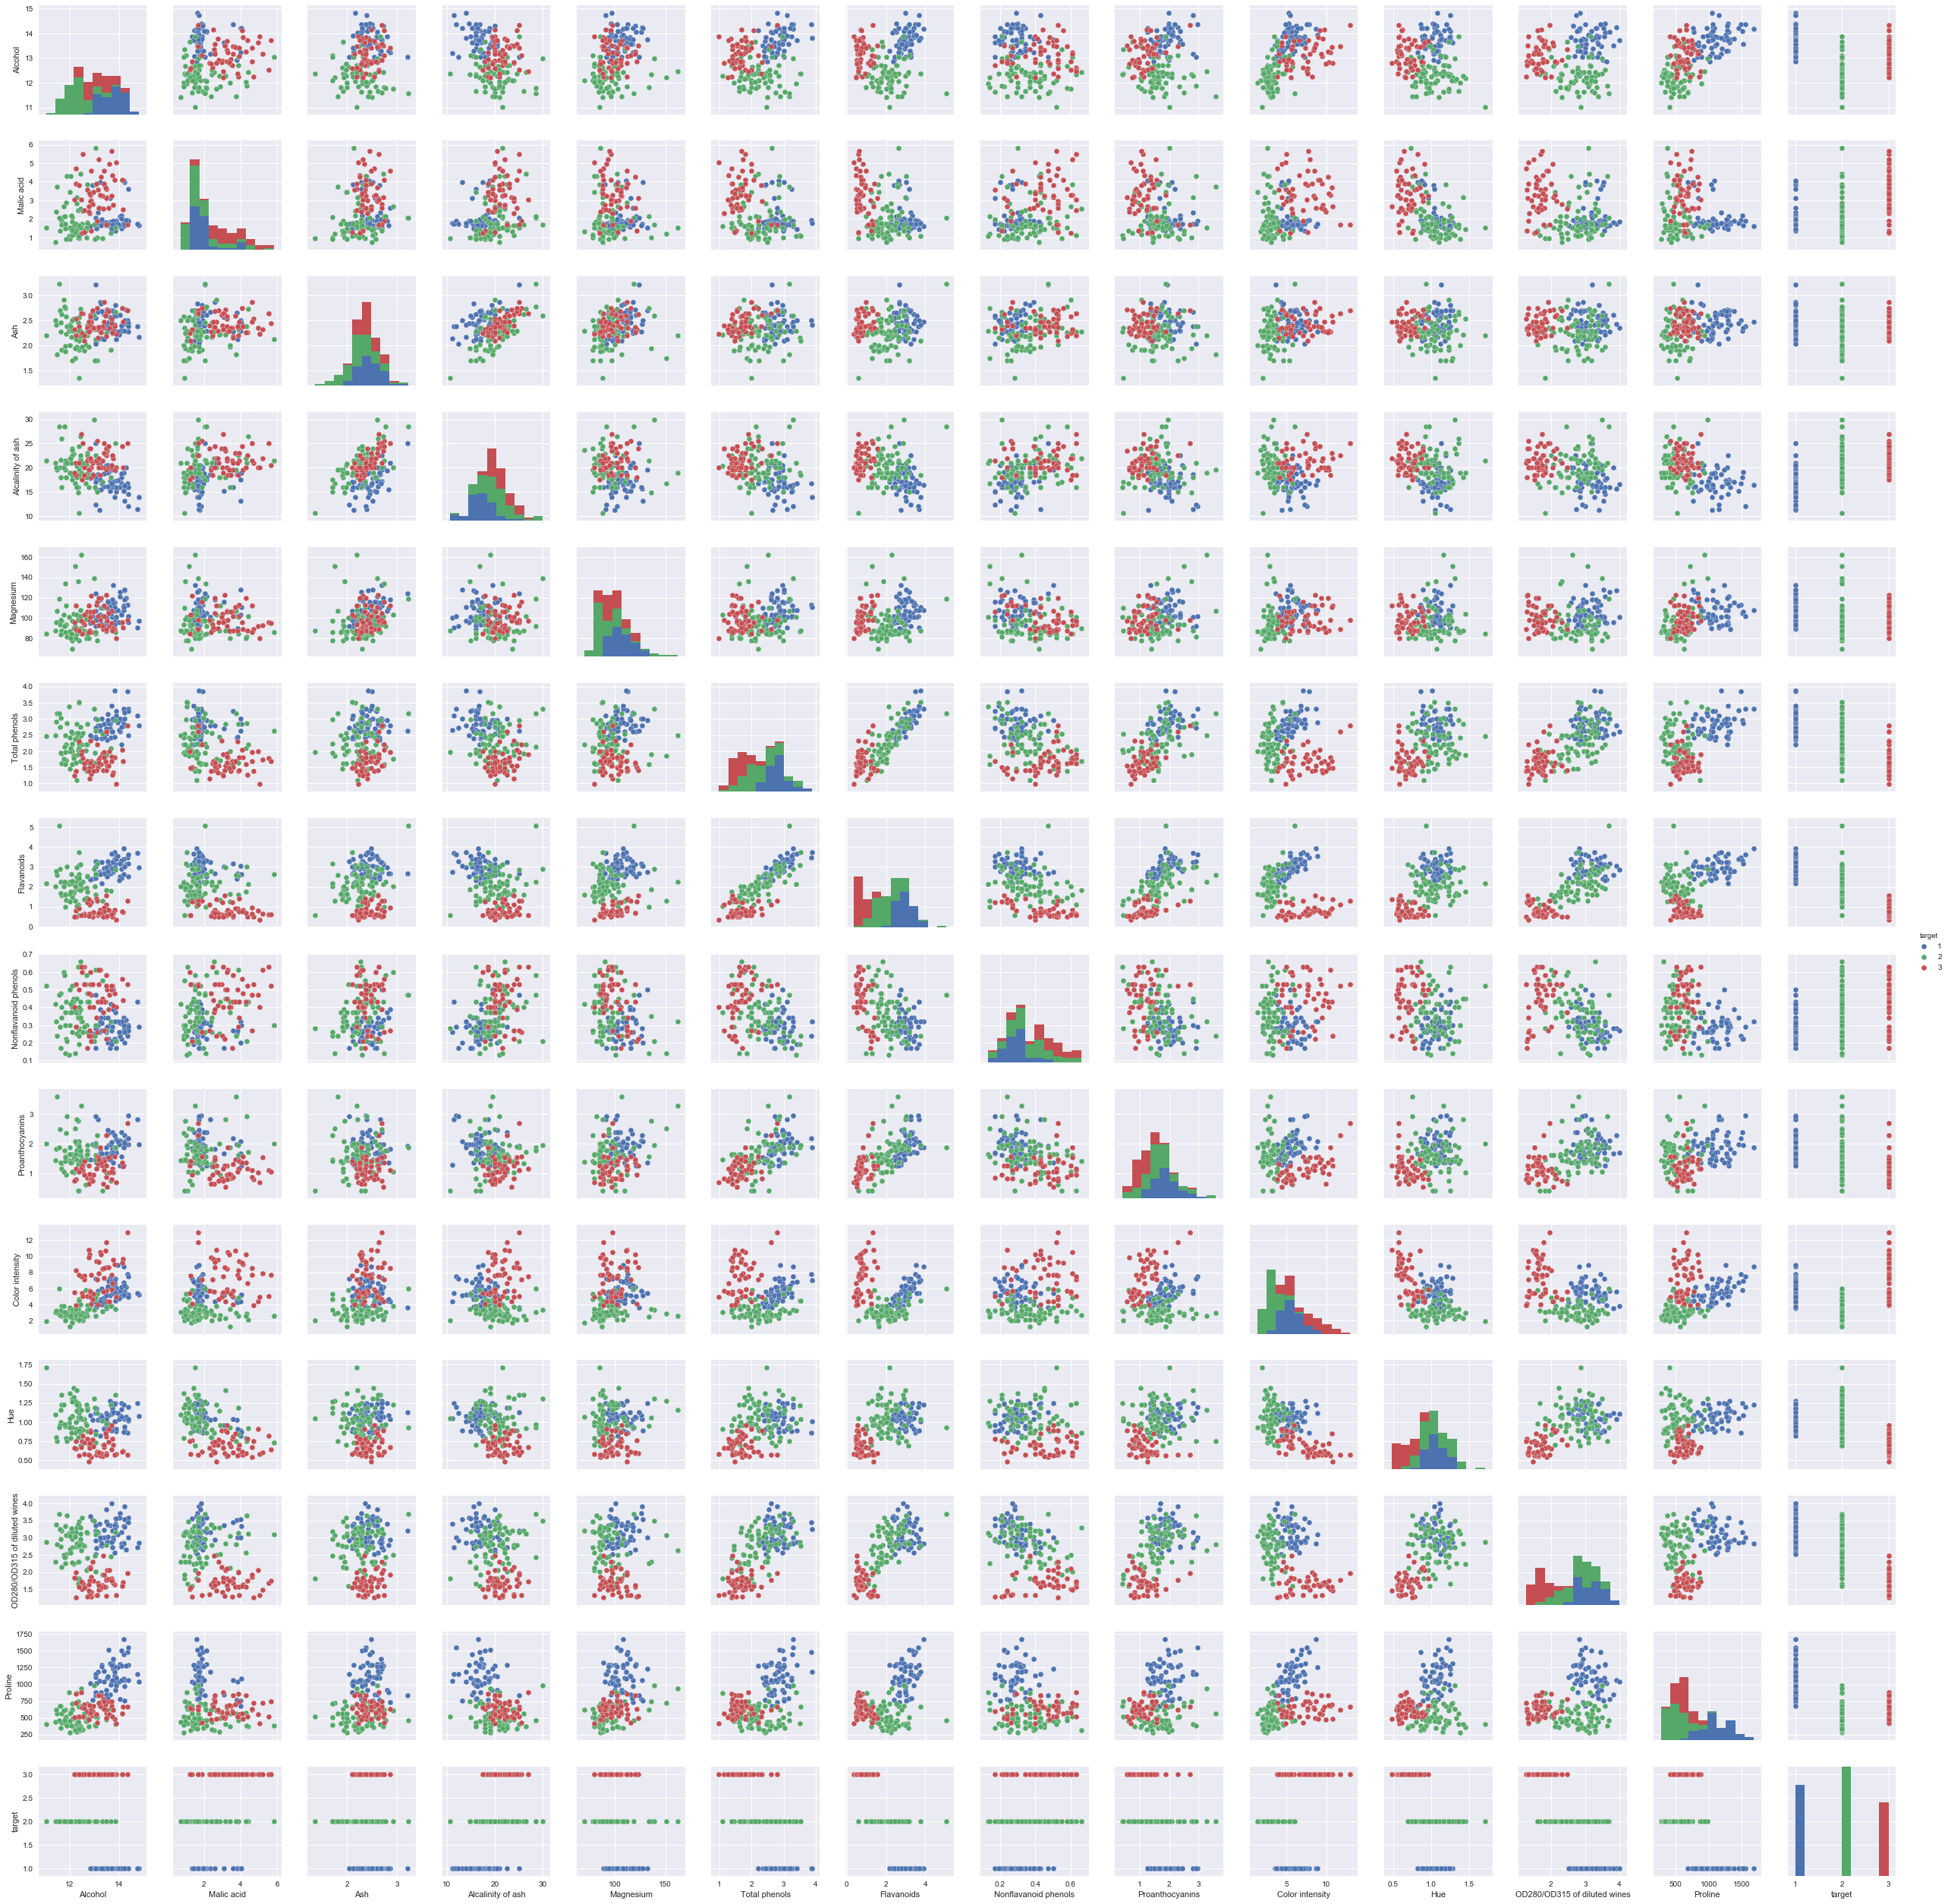

In [253]:
sns.pairplot(df, hue='target')

Посмотрим подробнее на 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols':

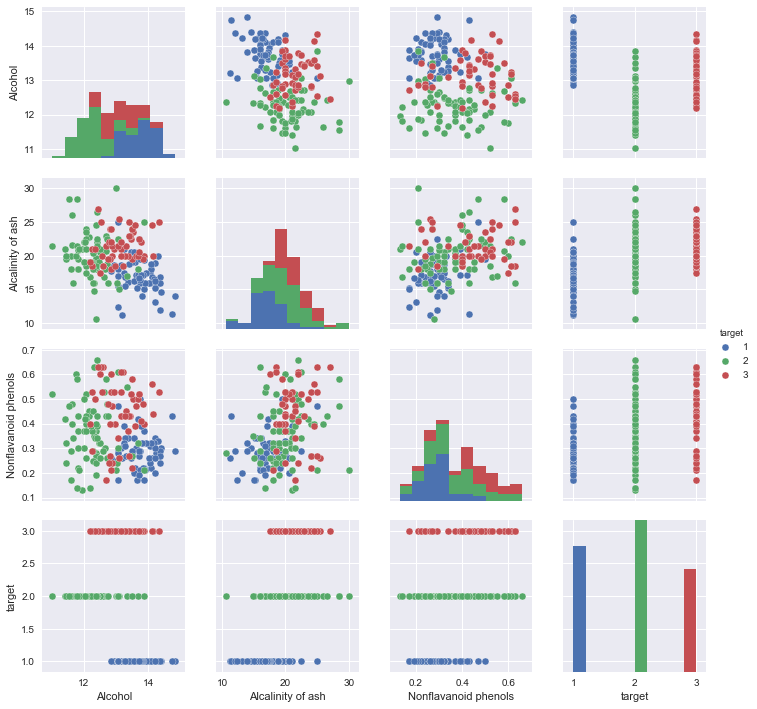

In [592]:
sns.pairplot(df[['Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols', 'target']], hue='target')

Очень похоже на нормальное распределение

Тогда мы можем найти его параметры через нашу реализованную функцию :)

Alcohol
size: 178
sample mean: 13.00
sample median: 13.05
sample std: 0.81
0.95 confidence interval: (12.88, 13.12)
KS-stat: 0.069
KstestResult(statistic=0.068541449549106293, pvalue=0.35890272266893386)
________________________________________

Alcalinity of ash
size: 178
sample mean: 19.49
sample median: 19.50
sample std: 3.33
0.95 confidence interval: (19.00, 19.99)
KS-stat: 0.063
KstestResult(statistic=0.06332274740488919, pvalue=0.46021602825042218)
________________________________________

Nonflavanoid phenols
size: 178
sample mean: 0.36
sample median: 0.34
sample std: 0.12
0.95 confidence interval: (0.34, 0.38)
KS-stat: 0.115
KstestResult(statistic=0.11518217188283314, pvalue=0.016325554288018296)
________________________________________



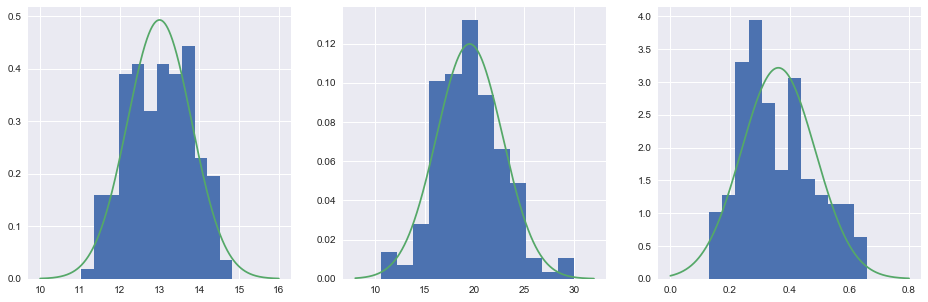

In [593]:
plt.figure(figsize=(16, 5))
for label, start, finish, i in zip(['Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'], 
                                [10, 8, 0], [16, 32, 0.8], [1, 2, 3]):
    print(label)
    size, sample_mean, sample_meadian, sample_std, conf_interval, kstest = normal_summary(df[label].values)
    plt.subplot(1, 3, i)
    plt.hist(df[label], normed=True, bins=12)
    x = np.linspace(start, finish, 1000)
    plt.plot(x, sps.norm(loc=sample_mean, scale=sample_std).pdf(x))
    print(kstest)
    print("________________________________________\n")
plt.show()

** Вывод: **
# TODO

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую можификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\frac{1}{k}\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

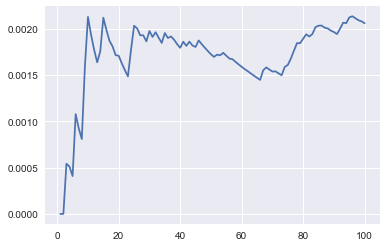

In [758]:
sample_normal = sps.norm.rvs(size=5)
f = lambda t: 1/ (2 * np.pi) ** (len(sample_normal) / 2) * np.exp(-1/2 * np.sum((sample_normal - t) ** 2))
n = 100
help_sample = sps.cauchy.rvs(size=n)
np_f = np.vectorize(f)
solve_integral = np.cumsum(np_f(help_sample)) / np.arange(1, n + 1)
plt.plot(np.arange(1, n + 1), solve_integral)
# plt.ylim(0, 0.002)
plt.show()

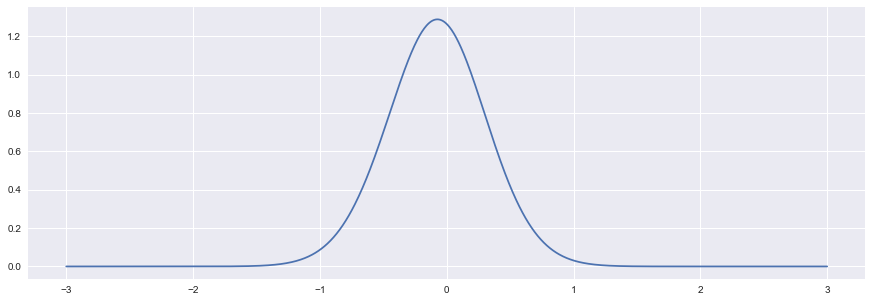

In [759]:
c = solve_integral[-1]
x = np.linspace(-3, 3, 1000)
plt.figure(figsize=(15, 5))
plt.plot(x, np_f(x) * sps.cauchy.pdf(x) / c)
plt.show()

In [760]:
expectation = 1 / (c * n) * np.sum(help_sample * np_f(help_sample))
expectation

-0.011056996139353894

Найдем матожидание тем же методом Монте-Карло у распределения, имеющего апостериорную плотность: $\dfrac{f(x)p(x)}{c}$

$$\mathsf{E} x = \int_{\mathbb{R}} \dfrac{xf(x)p(x)}{c} = \frac{1}{ck}\sum\limits_{i = 1}^{k} Y_i f(Y_i)$$

** Вывод: **
Таким образом, метод Монте-Карло позволяет сосчитать численно аналитически-неберущиеся интегралы. Кажется, это очень мощный метод в статистике. 

**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

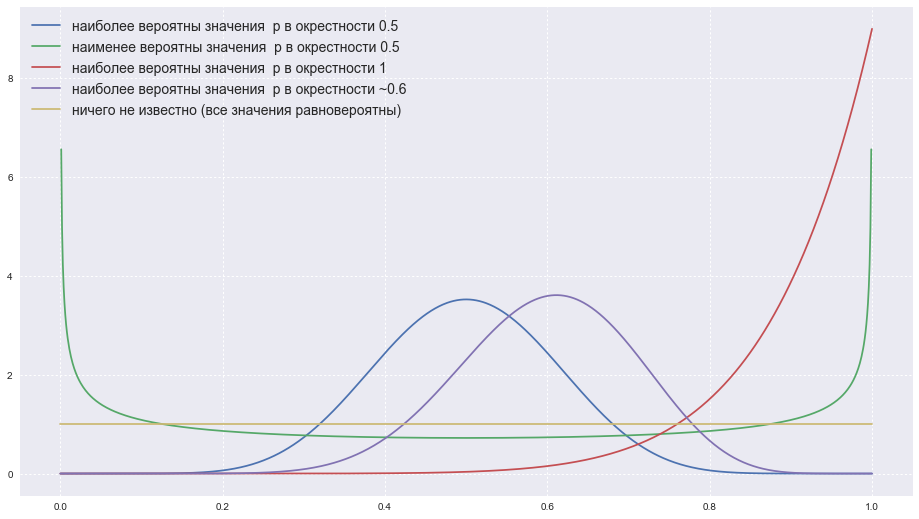

In [221]:
plt.figure(figsize=(16, 9))
x = np.linspace(0, 1, 1000)
plt.plot(x, sps.beta(a=10, b=10).pdf(x), label='наиболее вероятны значения  p в окрестности 0.5')
plt.plot(x, sps.beta(a=0.6, b=0.6).pdf(x), label='наименее вероятны значения  p в окрестности 0.5')
plt.plot(x, sps.beta(a=9, b=1).pdf(x), label='наиболее вероятны значения  p в окрестности 1')
plt.plot(x, sps.beta(a=12, b=8).pdf(x), label='наиболее вероятны значения  p в окрестности ~0.6')
plt.plot(x, sps.beta(a=1, b=1).pdf(x), label='ничего не известно (все значения равновероятны)')
plt.grid(ls=':')
plt.legend(loc='best', fontsize=14)
plt.show()

Сопряженное для бернуллиевского есть бета распделение. Гиперпараметры бета распределения $\alpha$ и  $\beta$ говорят нам об априорных знаниях о монете. Расписав плотность выборки бернуллиевского распределения: $p^{\sum x_i} (1 - p) ^ {n - \sum x_i}$ и пристально посмотрев на плотность бета распределения: $\dfrac{x^{\alpha - 1}(1 - x)^{\beta - 1} }{B(\alpha, \beta)}$, понятно, что гиперпараметр $\alpha$ отвечает за количество успехов в $n$ испытаниях Бернулли, а гиперпараметр $\beta$ отвечает за количество неудач в $n$ испытаниях Бернулли, что действительно согласуется с вышеописанными графиками и логикой: матожидание бета распределение, т.е. наша оценка параметра $\theta$ есть $\dfrac{\alpha}{\alpha + \beta} = \dfrac{\sum успех}{\sum успех + \sum неудачи} = \dfrac{\sum успех}{общее \ количество \ испытаний}$

На самом деле, тут можно сослаться к сноске из википедии https://en.wikipedia.org/wiki/Conjugate_prior
и сказать, что все-таки бОльшая часть сторонников Байесовского метода используют выше описанные характеристики апостериорных параметров.

Ниже приведена реализация некоторых вспомогательных функций.

In [223]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки + 1, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [234]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(list(map(lambda n: np.array([a + np.sum(sample[:n]), b + len(sample[:n]) - np.sum(sample[:n])]), 
                                          range(len(sample)+1))))
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

## Симметричная монета, правильные параметры

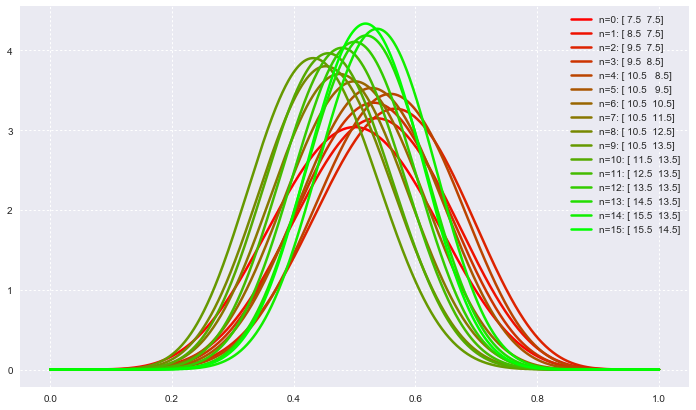

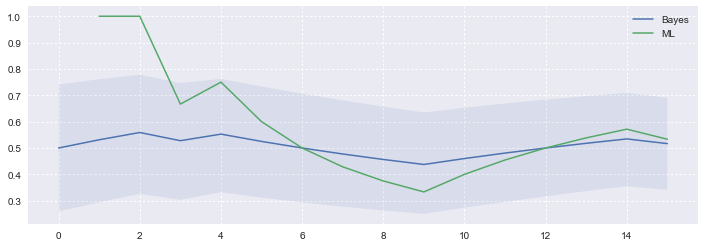

In [237]:
sample = sps.bernoulli(0.5).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 7.5, 7.5))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample, 7.5, 7.5))

## Симметричная монета, неправильные парамтеры

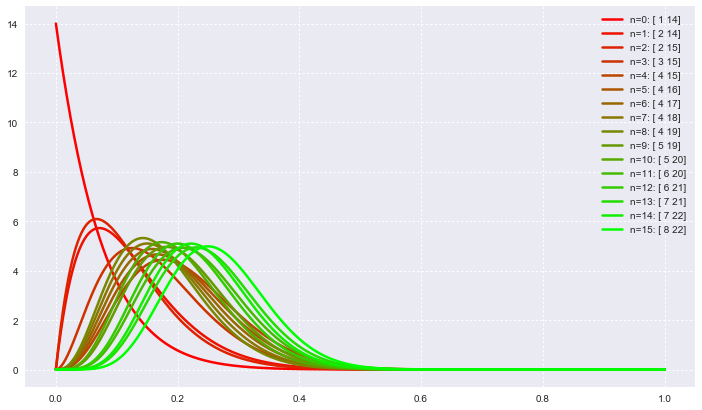

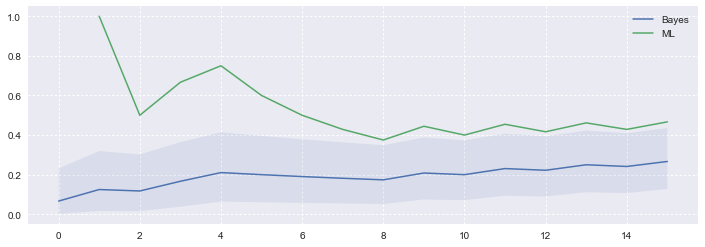

In [259]:
sample = sps.bernoulli(0.5).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 1, 14))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample, 1, 14))

## Несимметричная монета, правильные параметры

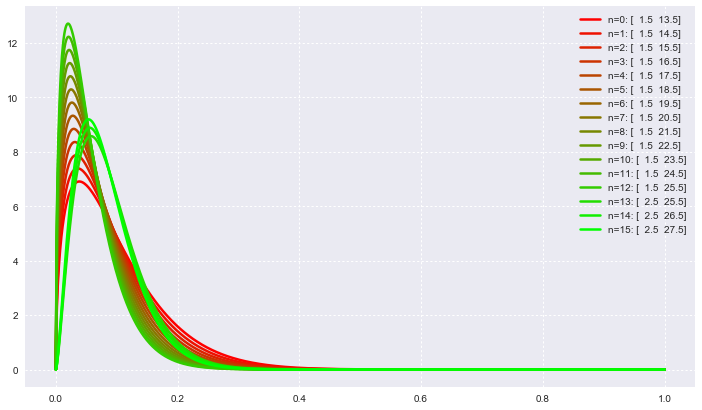

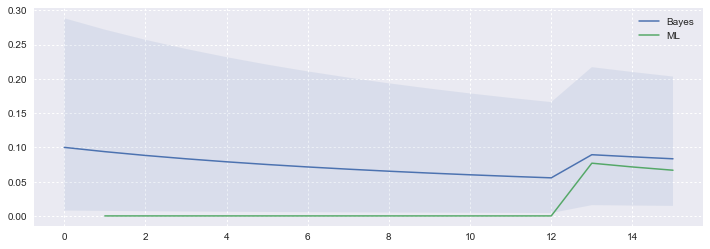

In [241]:
sample = sps.bernoulli(0.1).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 0.1 * 15, 0.9 * 15))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample, 0.1 * 15, 0.9 * 15))

## Несимметричная монета, неправильные параметры

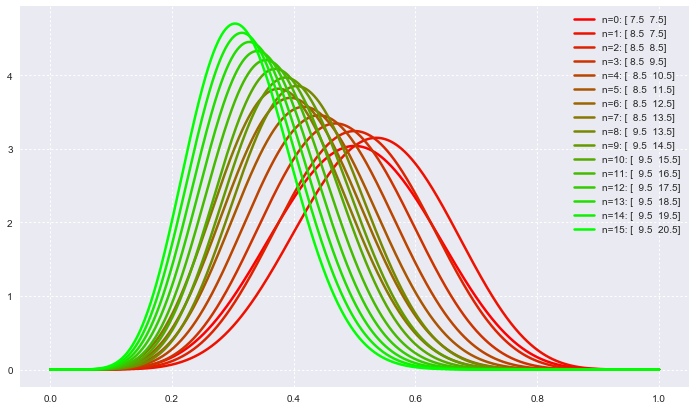

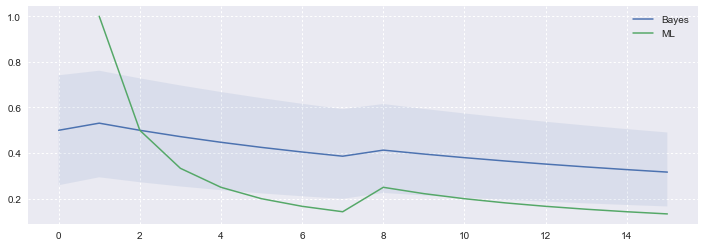

In [260]:
sample_simmetr = sps.bernoulli(0.1).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample_simmetr, 7.5, 7.5))
likelihood = np.cumsum(sample_simmetr) / np.arange(1, len(sample_simmetr) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample_simmetr, 7.5, 7.5))

** Вывод: **
Здесь стоит сказать, что правильно подбирать гиперпараметры, максимизируя обоснованность (evidence).

Видим, что при правильно поборанных параметрах априорного распределения искомая апостериорная плотность изменяется не сильно (не сильно меняются основные оценки, такие как матожидание, медиана, мода). 

Из сравнения с ОМП видно, что байесовская оценка горазду лучше себя проявляет на выборках малого рамера, что дает ей заметное преимущество по сравнению с частотыми подходами.

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

Рассмотрим трех различных студентов:
* сильный (p = 0.9)
* средний (p = 0.5)
* слабый (p = 0.2)

In [761]:
def get_bayesian_interval(distr_class, post_params, alpha=0.95):
    ''' Возвращает доверительный интервал уровня доверия alpha
    '''
    size = len(post_params)
    distrs = []
    for n in range(size): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))

    return list(zip([d.ppf((1 - alpha) / 2) for d in distrs], [d.ppf((1 + alpha) / 2) for d in distrs]))

In [762]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(list(map(lambda n: np.array([a + np.sum(sample[:n]), b + len(sample[:n]) - np.sum(sample[:n])]), 
                                          range(len(sample)+1))))
    return params

In [773]:
n_questions = 600
strong, medium, weak = 0.9, 0.5, 0.2
strong_student_sample = sps.bernoulli(p=strong).rvs(n_questions)
medium_student_sample = sps.bernoulli(p=medium).rvs(n_questions)
weak_student_sample = sps.bernoulli(p=weak).rvs(n_questions)
alpha_array = np.linspace(0.5, 1, 21)

def prior_params(type_student):
        return type_student * 15, (1 - type_student) * 15

In [774]:
def cnt_marks_in_credible_interval(left_ci, right_ci):
    ''' Считает количество оценок, которые попали в байесовский доверительный интервал
        Return: mark -- оценка, если количество оценок, попавших в доверительный интервал равно 1, 
                        None -- иначе
                len(mark) -- количество оценок, попавших в доверительный интервал
    '''
    marks = np.arange(1, 11) / 10
    ci_marks = marks[(left_ci < marks) & (marks < right_ci)]
#     print(ci_marks)
    if len(ci_marks) == 1:
        return ci_marks[0] * 10 + 1, 1
    return None, len(ci_marks)

#### Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?

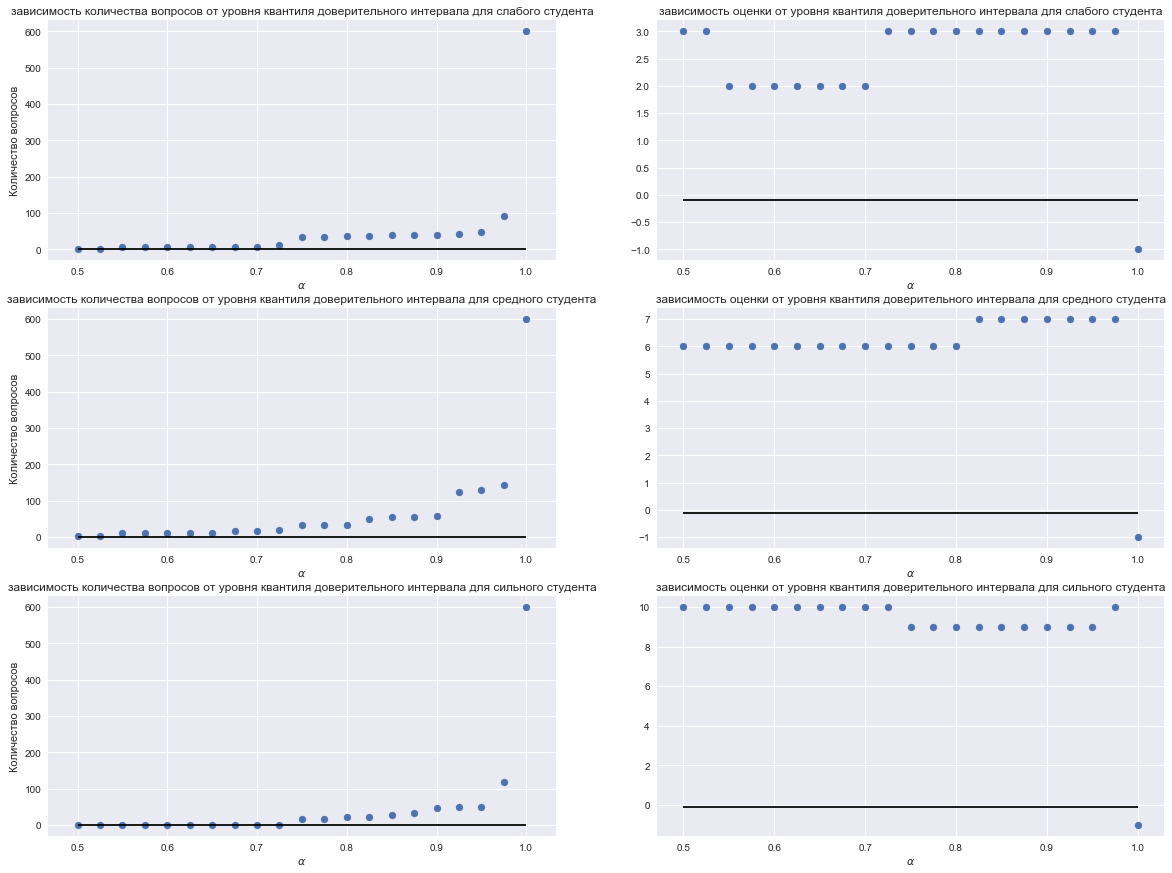

In [770]:
plt.figure(figsize=(20, 15))
for i, sample, type_student, label_student in zip([1, 2, 3], [weak_student_sample, 
                                                              medium_student_sample, 
                                                              strong_student_sample], 
                               [weak, medium, strong], 
                                                  ["слабого студента", "средного студента", "сильного студента"]):
    posterior_params = bern_posterior_params(sample, *prior_params(type_student))
    marks = []
    cnt_quest_array = []
    for alpha in alpha_array:
        credible_interval = get_bayesian_interval(sps.beta, posterior_params, alpha)
    #     print(alpha)
    #     for cr in credible_interval:
    #         print(cr)
        for cnt_questions, ci in enumerate(credible_interval):
            mark, len_ci_marks = cnt_marks_in_credible_interval(*ci)
            if mark is not None:
    #             print(cnt_questions)
                cnt_quest_array.append(cnt_questions)
                marks.append(mark)
                break
            if cnt_questions == len(credible_interval) - 1:
                cnt_quest_array.append(cnt_questions)
                marks.append(-1)
    #     print("______________________________")
    #     print("______________________________")
    plt.subplot(3, 2, 2 * i - 1)
    plt.scatter(alpha_array, cnt_quest_array)
    plt.hlines(-0.1, 0.5, 1)
    plt.title("зависимость количества вопросов от уровня квантиля доверительного интервала для %s" % label_student)
    plt.xlabel("$\\alpha$")
    plt.ylabel("Количество вопросов")
    plt.subplot(3, 2, 2 * i)
    plt.hlines(-0.1, 0.5, 1)
    plt.scatter(alpha_array, marks)
    plt.title("зависимость оценки от уровня квантиля доверительного интервала для %s" % label_student)
    plt.xlabel("$\\alpha$")
    plt.ylabel("")
plt.show()

**Вывод: ** чтобы экзаменатору задавать меньше вопросов, квантиль уровня доверя нужно брать как можно меньше. Для экзаменатора это означает, что он просто посмотрит в зачетку и поставит примерно такую же оценку. Точность, основанная на заниях студента, у такой оценки будет маленькая.

#### Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?

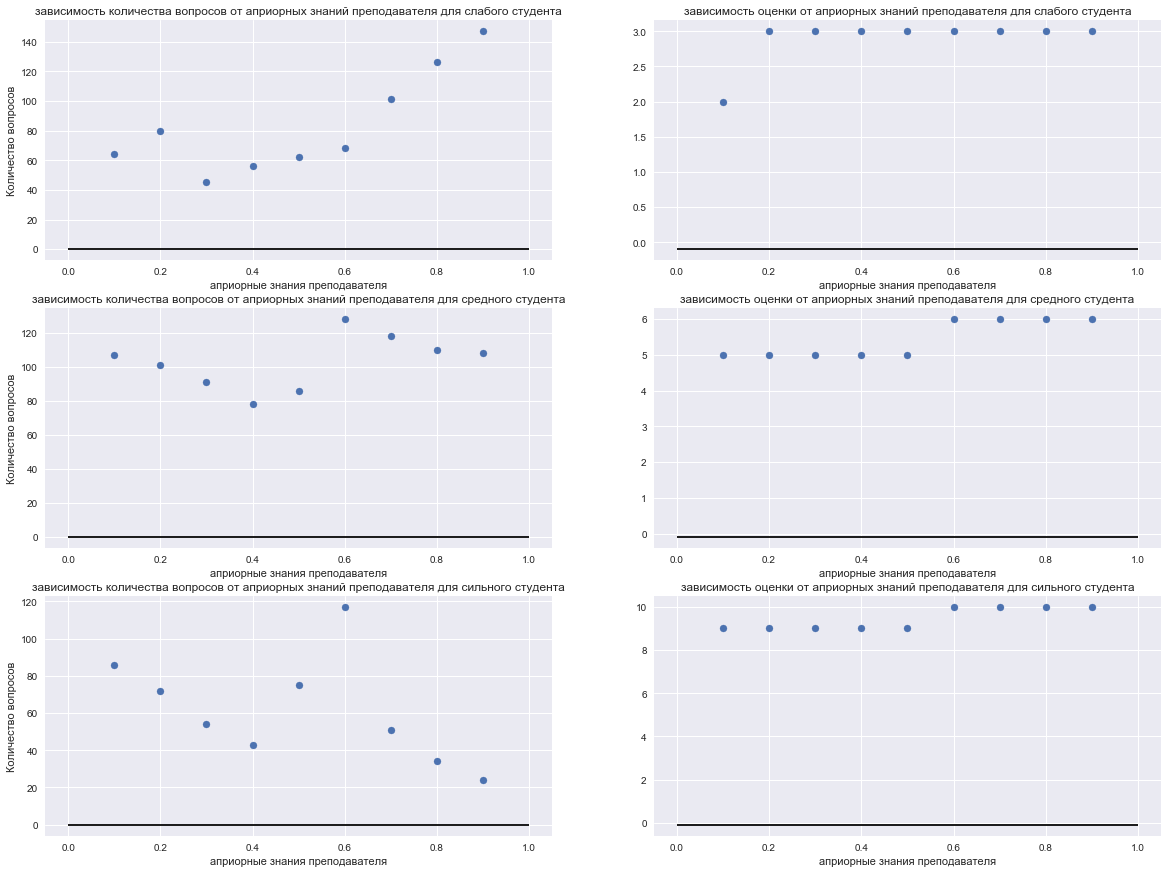

In [775]:
plt.figure(figsize=(20, 15))
for i, sample, type_student, label_student in zip([1, 2, 3], [weak_student_sample, 
                                                              medium_student_sample, 
                                                              strong_student_sample], 
                               [weak, medium, strong], 
                                                  ["слабого студента", 
                                                   "средного студента", 
                                                   "сильного студента"]):
    marks = []
    cnt_quest_array = []
    prior = np.arange(1, 10) / 10
    for prior_teacher in prior:
        posterior_params = bern_posterior_params(sample, *prior_params(prior_teacher))
#         print(type_student, prior_teacher)
#         print(posterior_params)
        credible_interval = get_bayesian_interval(sps.beta, posterior_params)
#         for cr in credible_interval:
#             print(cr, cr[1] - cr[0])
        for cnt_questions, ci in enumerate(credible_interval):
            mark, len_ci_marks = cnt_marks_in_credible_interval(*ci)
            if mark is not None:
    #             print(cnt_questions)
                cnt_quest_array.append(cnt_questions)
                marks.append(mark)
                break
            if cnt_questions == len(credible_interval) - 1:
                cnt_quest_array.append(cnt_questions)
                marks.append(-1)
#         print("______________________________")
#         print("______________________________")
    plt.subplot(3, 2, 2 * i - 1)
    plt.scatter(prior, cnt_quest_array)
    plt.hlines(-0.1, 0, 1)
    plt.title("зависимость количества вопросов от априорных знаний преподавателя для %s" % label_student)
    plt.xlabel("априорные знания преподавателя")
    plt.ylabel("Количество вопросов")
    plt.subplot(3, 2, 2 * i)
    plt.hlines(-0.1, 0, 1)
    plt.scatter(prior, marks)
    plt.title("зависимость оценки от априорных знаний преподавателя для %s" % label_student)
    plt.xlabel("априорные знания преподавателя")
    plt.ylabel("")
plt.show()

** Вывод: **
Как оказалось, подружиться с таким преподавателем все-таки стоит, ведь дружба в нашем понимании означает более высокое априорное знание о студенте. Как мы видим, оценка студента все-таки становится лучше, да и вопросов меньше задается. Но отклонения достаточно небольшие. Например, в некоторых случая вопросов задается даже и больше, но это, скорее всего, связано с достаточно большим априорным знанием преподавателя и неготовноностью студента подтвердить эти априорные параметры. Отсуда можно сказать: на Бога надейся, а сам не плошай:)

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

## для $\mathcal{N}(\theta, 1)$

Сопряженным распределением для нормального с неизвестным матожиданием и известной диспресией, равной 1, является нормальное распределение. Апостериорное распределение параметра $\theta$ есть $\mathcal{N}\left(\dfrac{\mu_0 + \sum X_i}{1 + n \sigma_0^2}, \dfrac{\sigma_0^2}{1 + n\sigma_0^2} \right)$, где $\mathcal{N}(\mu_0, \sigma_0^2)$ -- априорное распределение параметра $\theta$

Тут получаем, что наша оценка, основанная на матожидании будет просто корректироваться величиной $\dfrac{\sum X_i}{1 + \sigma_0^2} $

## Параметры подобраны хорошо; $\theta = 0$

In [262]:
def norm_posterior_params(sample, mu_0, sigma_0):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(list(map(lambda n: np.array([mu_0 + np.sum(sample[:n]) / (1 + n * sigma_0 ** 2), 
                                                   sigma_0 ** 2 / (1 + n * sigma_0 ** 2)]), 
                                          range(len(sample)+1))))
    return params

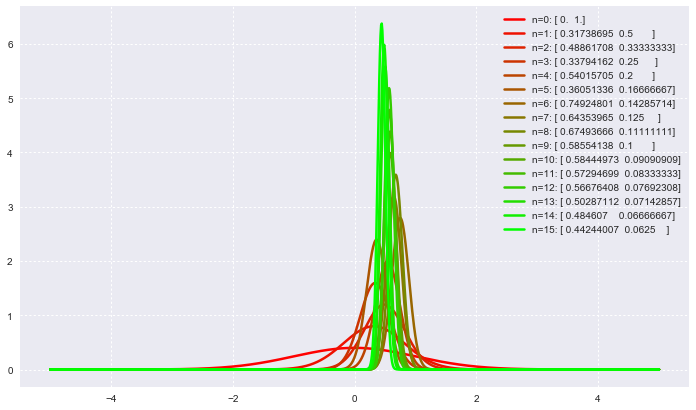

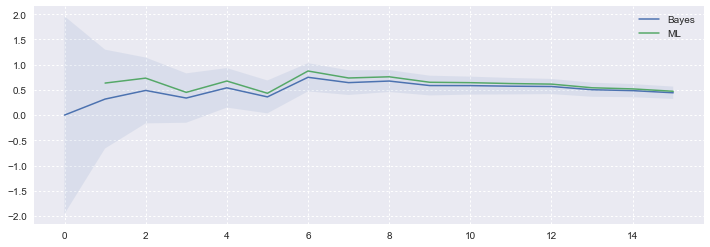

In [784]:
sample = sps.norm.rvs(size=15)
grid = np.linspace(-5, 5, 1000)
draw_posteriori(grid, sps.norm, norm_posterior_params(sample, 0, 1))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.norm, post_params=norm_posterior_params(sample, 0, 1))

## Параметры подобраны не очень хорошо; $\theta = 0$

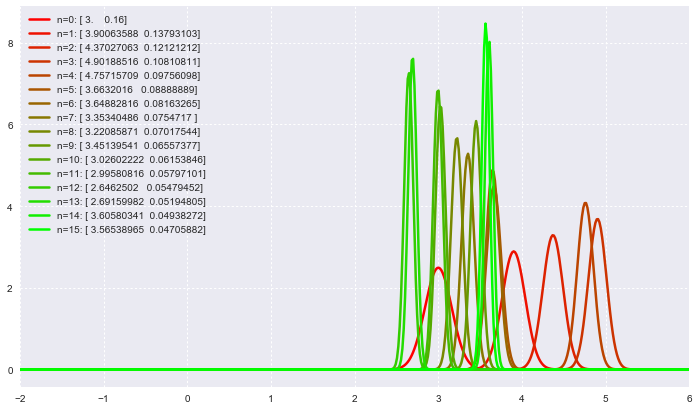

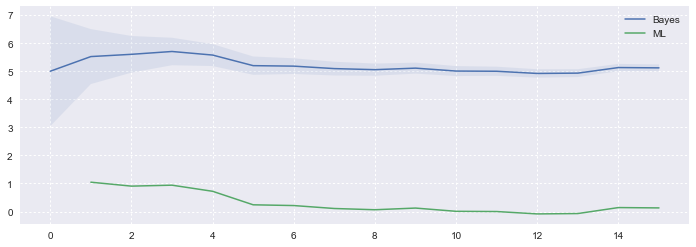

In [786]:
sample = sps.norm.rvs(size=15)
grid = np.linspace(-8, 8, 1000)
draw_posteriori(grid, sps.norm, norm_posterior_params(sample, 3, 0.4), xlim=(-2, 6))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.norm, post_params=norm_posterior_params(sample, 5, 1))

## для $Exp(\theta)$

Сопряженным распределением для экспоненциального является гамма-распределение. Апостериорное распределение параметра $\theta$ есть $\Gamma(\alpha + \sum X_i, \beta + n)$, где $\Gamma(\alpha, \beta)$ -- априорное распределение параметра $\theta$

In [781]:
def exp_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    params = np.array(list(map(lambda n: np.array([b + n, 0, 1/(a + np.sum(sample[:n]))]), 
                                          range(len(sample)+1))))
    return params

## Параметры подобраны хорошо; $\theta = 1$

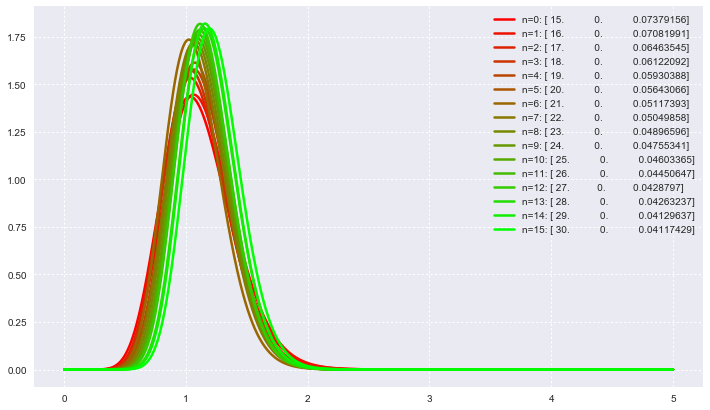

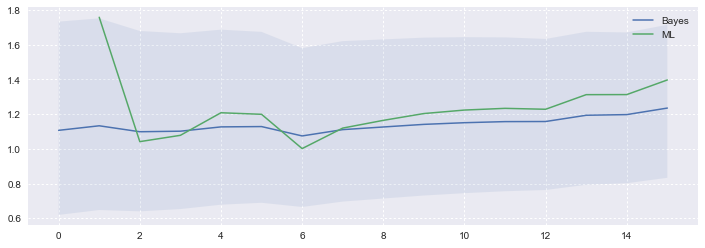

In [782]:
sample = sps.expon.rvs(size=15)
grid = np.linspace(0, 5, 1000)
help_sample = sps.expon.rvs(size=15)
draw_posteriori(grid, sps.gamma, exp_posterior_params(sample, np.sum(help_sample), 15))
likelihood = np.arange(1, len(sample) + 1) / np.cumsum(sample)
draw_estimations(ml=likelihood, distr_class=sps.gamma, 
                 post_params=exp_posterior_params(sample, np.sum(help_sample), 15))

## Параметры подобраны не очень хорошо; $\theta = 1$

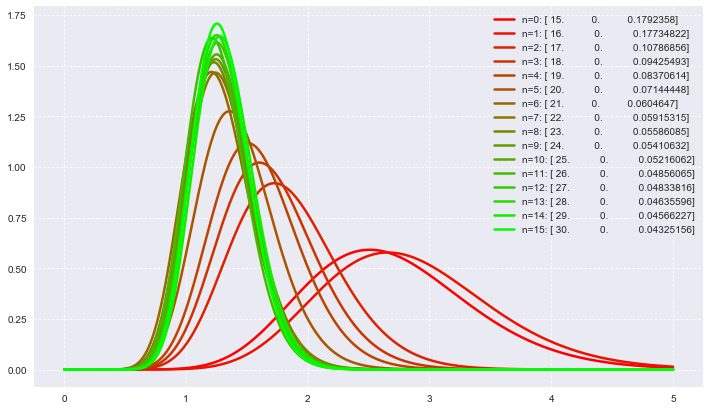

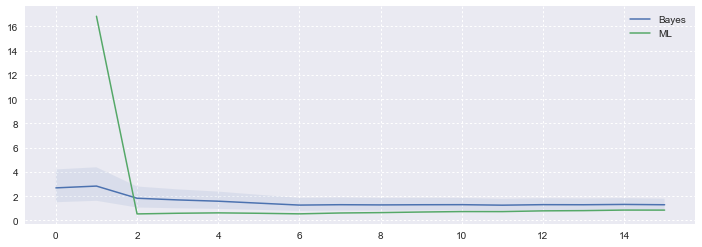

In [783]:
sample = sps.expon.rvs(size=15)
grid = np.linspace(0, 5, 1000)
help_sample = sps.expon(scale=1/4).rvs(size=15)
draw_posteriori(grid, sps.gamma, exp_posterior_params(sample, np.sum(help_sample), 15))
likelihood = np.arange(1, len(sample) + 1) / np.cumsum(sample)
draw_estimations(ml=likelihood, distr_class=sps.gamma, 
                 post_params=exp_posterior_params(sample, np.sum(help_sample), 15))

** Вывод: **
Вывод аналогичен задаче 8. Просто еще раз убедились в крутости Байесовского метода на матых выборках и чутка научились подбирать гиперпараметры априорного распределения (ну хотя бы поняли их суть)))

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.


Сопряженное $\mathcal{N}(\theta_1, \theta_2^{-1})$ есть $NormalGamma$ с гиперпараметрами $\mu_0, \nu, \alpha, \beta$ (выводил на семинаре). Обратимся к википедии: https://en.wikipedia.org/wiki/Conjugate_prior
и поймем интерпретацию гиперпараметров этого распределения.

In [714]:
class NormalGamma:
    def __init__(self, mu, lambd, alpha, beta):
        self.mu = mu
        self.lambd = lambd
        self.alpha = alpha
        self.beta = beta
        
    def pdf(x, tau):
        down_const = sp.special.gammainc(self.beta) * np.sqrt(2 * np.pi)
        first_prod = self.alpha ** self.beta * np.sqrt(self.lambd) / down_const
        second_prod = tau ** (self.beta - 1/2) * np.exp(-self.alpha * tau)
        third_prod = np.exp(-self.lambd * tau * (x - mu) ** 2 / 2)
        return first_prod * second_prod * third_prod
    
    def normalgamma_posterior_params(self, sample):
        ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
            a, b --- параметры априорного распределения.
        '''
        params = np.array(list(map(lambda n: np.array([
            (self.mu * self.lambd + n * np.mean(sample[:n])) / (self.lambd + n), 
            self.lambd + n, 
            self.alpha+0.5*np.sum((sample[:n]-np.mean(sample[:n]))**2)+n*self.lambd*(np.mean(sample[:n])-self.mu)/(2*(self.lambd+n)),
            self.beta + n / 2
        ]), 
                                              range(len(sample)+1))))
        return params

** Вывод: **
# TODO